# Stochastic Gradient Descent (SGD)

In [1]:
%matplotlib inline
from fastai.basics import *

## Linear Regression problem
The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.0342,  1.0000],
        [-0.8372,  1.0000],
        [-0.9248,  1.0000],
        [ 0.9615,  1.0000],
        [ 0.4406,  1.0000]])

In [3]:
a = tensor(3.,2); a

tensor([3., 2.])

In [4]:
# x@a is a matrix vector product
y = x@a + torch.rand(n)
y

tensor([ 2.8646,  0.2405, -0.2595,  5.8105,  3.6237,  2.7785,  3.0511,  4.2981,
         0.6448,  1.7490,  4.7867,  5.0393,  2.0805,  3.3363,  5.0608,  2.0714,
         1.2374,  5.2296,  0.7178,  2.6760,  5.2825,  1.7423,  3.1355,  0.4428,
         3.1839, -0.0947,  2.2729,  2.3979,  3.4120,  4.4091,  3.9883,  1.5441,
         3.5387,  3.2763,  0.8130,  5.2769,  3.1930,  3.9433,  0.9581,  4.1220,
         1.0771,  2.2760,  0.7287, -0.7103,  4.7206, -0.0980, -0.0699,  1.3286,
         4.8367,  1.1209,  0.9749,  3.8319,  1.4920,  0.0335,  1.0213,  2.7168,
         4.3114,  0.7720,  2.4961,  4.2130,  3.4641,  4.9074,  2.7334,  2.0759,
        -0.1015,  4.3958,  0.4180,  5.4885,  4.0466,  0.1001,  4.7754,  4.8043,
         5.0823,  2.6907,  1.3425,  0.7479,  4.4459,  1.2329,  4.3750,  4.7398,
         2.9368,  1.5497,  1.8549, -0.4045,  4.7973,  4.5431,  3.2402,  3.7317,
        -0.0820,  4.9779,  0.6792,  1.8832,  4.0006,  3.6021,  1.2227,  2.4382,
         2.2509,  4.0219,  0.6365,  4.67

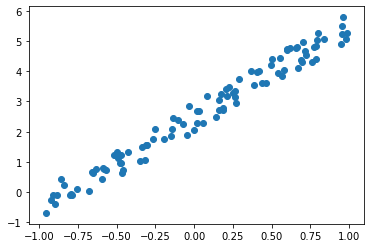

In [5]:
plt.scatter(x[:,0], y);

For a regression problem the most common error function or loss function is the mean squared error. Minimize the error between the points and the line x@a to find parameters (weights).

In [6]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe a = (-1.0,1.0) then we can compute y_hat which is our prediction and then compute our error.

In [7]:
a = tensor(-1.,1)

y_hat = x@a
mse(y_hat, y)

tensor(8.2121)

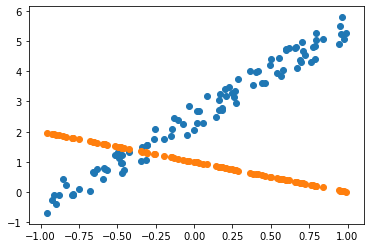

In [8]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the model (linear regression) and the evaluation criteria (or loss function). Now we need to handle optimization; that is, how do we find the best values for a? How do we find the best fitting linear regression.

# Gradient Descent
Find the values in "**a**" that minimize mse_loss.

Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.


In [9]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [10]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [11]:
lr = 1e-1
for t in range(100): update()

tensor(8.2121, grad_fn=<MeanBackward0>)
tensor(1.4060, grad_fn=<MeanBackward0>)
tensor(0.4208, grad_fn=<MeanBackward0>)
tensor(0.1684, grad_fn=<MeanBackward0>)
tensor(0.1014, grad_fn=<MeanBackward0>)
tensor(0.0836, grad_fn=<MeanBackward0>)
tensor(0.0789, grad_fn=<MeanBackward0>)
tensor(0.0777, grad_fn=<MeanBackward0>)
tensor(0.0773, grad_fn=<MeanBackward0>)
tensor(0.0772, grad_fn=<MeanBackward0>)


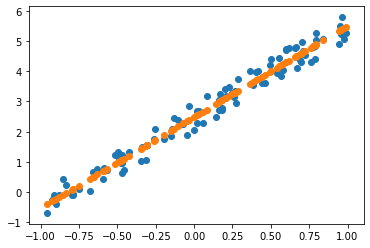

In [12]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach().numpy());

# Animate it

In [13]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [17]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach().numpy())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use mini-batches.